3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [32]:
gdp_df = pd.read_csv("../data/UN_GDP.csv")

print(gdp_df.head())  
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2023  1992.424394              NaN
1     Afghanistan  2022  1981.710168              NaN
2     Afghanistan  2021  2144.166570              NaN
3     Afghanistan  2020  2769.685745              NaN
4     Afghanistan  2019  2927.245144              NaN
     Country or Area  Year        Value  Value Footnotes
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [34]:
print("Shape of gdp_df:", gdp_df.shape)
print("\nData Types:")
print(gdp_df.dtypes)

Shape of gdp_df: (8219, 4)

Data Types:
Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [36]:
gdp_df.drop('Value Footnotes', axis=1, inplace=True)

gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

print(gdp_df.head())  
print(gdp_df.tail())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2023     1992.424394
1  Afghanistan  2022     1981.710168
2  Afghanistan  2021     2144.166570
3  Afghanistan  2020     2769.685745
4  Afghanistan  2019     2927.245144
       Country  Year  GDP_Per_Capita
8214  Zimbabwe  1994     3965.730986
8215  Zimbabwe  1993     3634.750494
8216  Zimbabwe  1992     3649.891947
8217  Zimbabwe  1991     4126.405247
8218  Zimbabwe  1990     4013.299059


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [38]:
max_year = gdp_df['Year'].max()

min_year = gdp_df['Year'].min()

print(f"Highest Year: {max_year}")
print(f"Lowest Year: {min_year}")

Highest Year: 2023
Lowest Year: 1990


In [156]:
filtered_df = gdp_df[(gdp_df['Year'] >= 1990) & (gdp_df['Year'] <= 2023)]

cleaned_df = filtered_df.dropna()

all_years = set(range(1990, 2024))
complete_data_countries = []

for country in cleaned_df['Country'].unique():
    years_present = set(cleaned_df[cleaned_df['Country'] == country]['Year'])
    if years_present == all_years:
        complete_data_countries.append(country)

complete_data_count = len(complete_data_countries)

missing_years_threshold = 3
countries_with_missing_years = []

for country in cleaned_df['Country'].unique():
    years_present = set(cleaned_df[cleaned_df['Country'] == country]['Year'])
    missing_years = all_years - years_present
    if len(missing_years) > missing_years_threshold:
        countries_with_missing_years.append((country, missing_years))

print(f"Number of countries with complete data for all years: {complete_data_count}")
print("Countries with missing many years of data:")
for country, missing_years in countries_with_missing_years:
    print(f"{country}: Missing years {missing_years}")

Number of countries with complete data for all years: 228
Countries with missing many years of data:
Afghanistan: Missing years {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999}
Cayman Islands: Missing years {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005}
CuraÃ§ao: Missing years {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999}
Djibouti: Missing years {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012}
Faroe Islands: Missing years {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007}
Kosovo: Missing years {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007}
Montenegro: Missing years {1990, 1991, 1992, 1993, 1994, 1995, 1996}
San Marino: Missing years {1990, 1991, 1992, 1993, 1994, 1995, 1996, 2023}
Serbia: Missing years {

The majority of missing data is in the 1990s.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

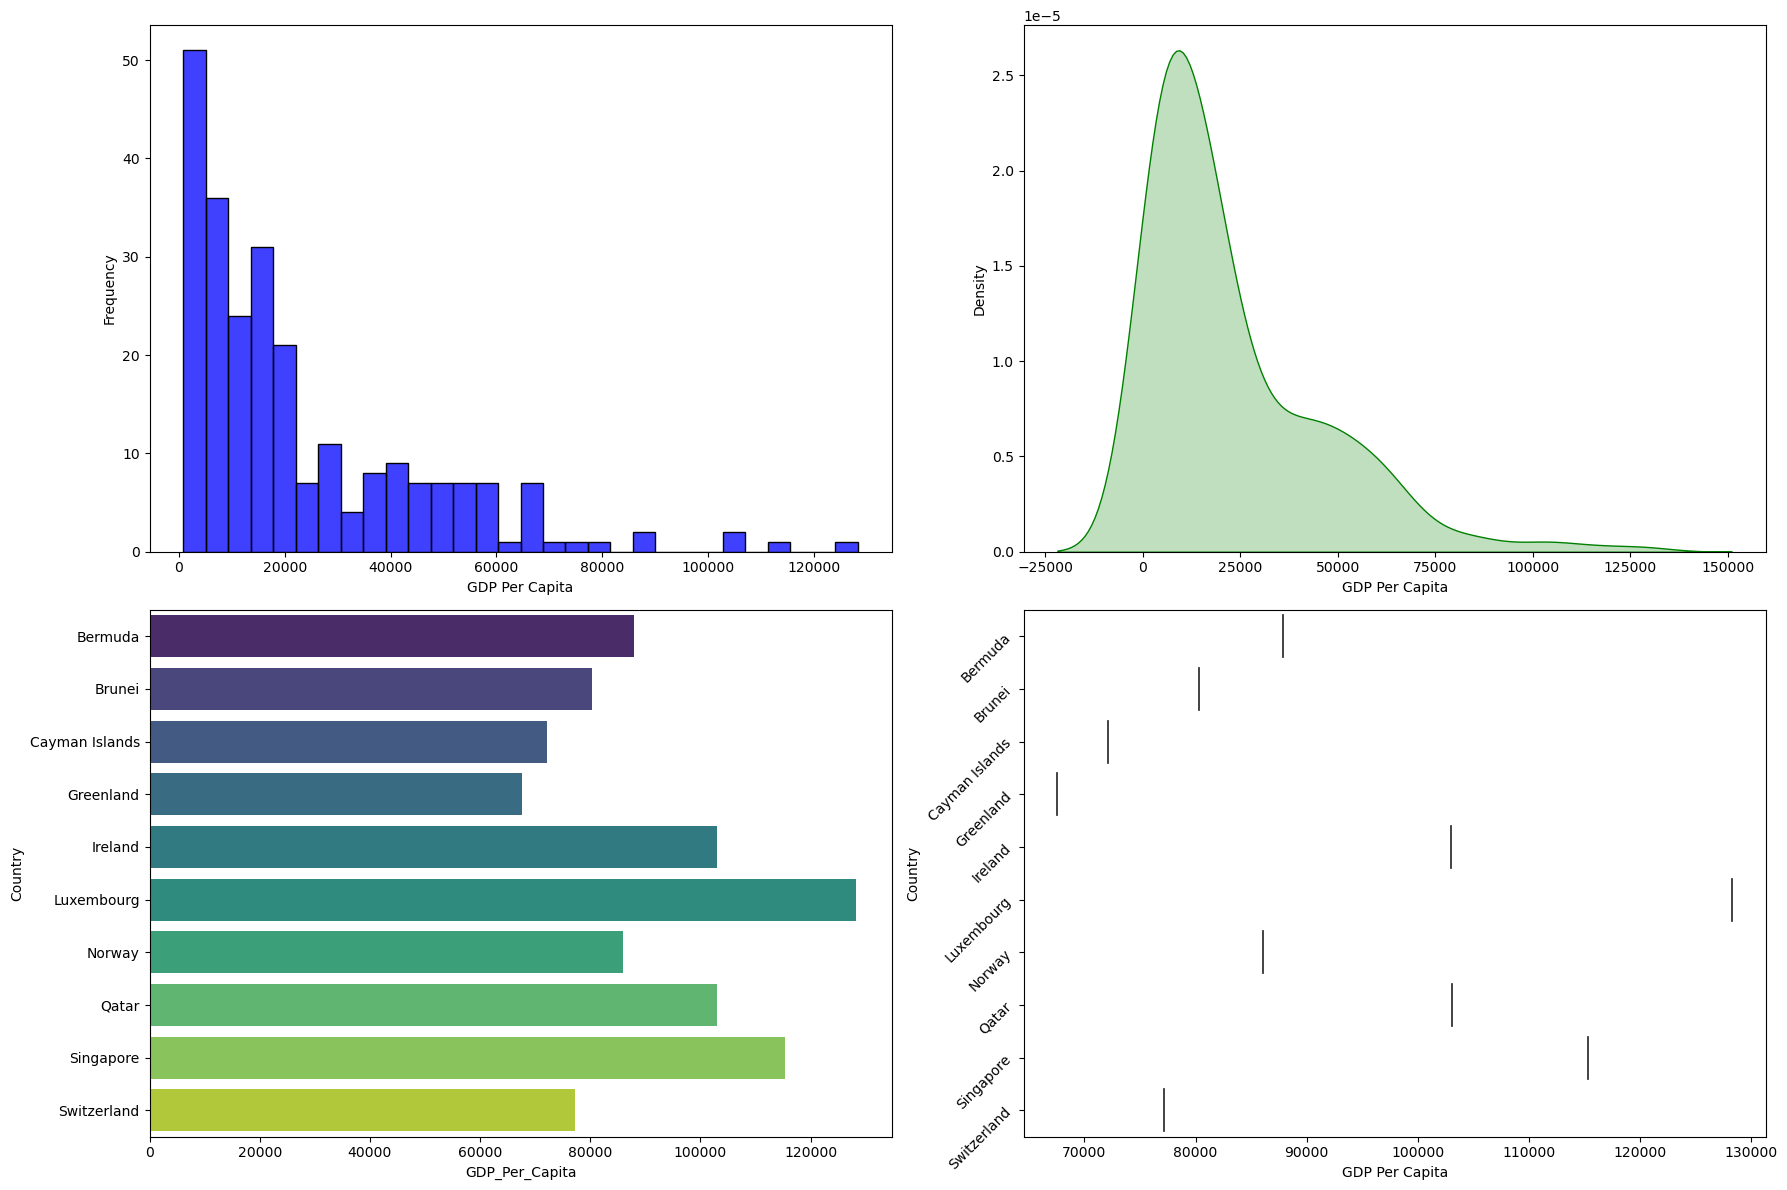

In [148]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020].dropna()

top_countries = gdp_2020.groupby('Country')['GDP_Per_Capita'].mean().nlargest(10).index
gdp_2020_top = gdp_2020[gdp_2020['Country'].isin(top_countries)]

plt.figure(figsize=(18, 12))

# histogram
plt.subplot(2, 2, 1)
sns.histplot(data=gdp_2020, x='GDP_Per_Capita', kde=False, bins=30, color='blue')
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')

# density plot
plt.subplot(2, 2, 2)
sns.kdeplot(data=gdp_2020, x='GDP_Per_Capita', fill=True, color='green')
plt.xlabel('GDP Per Capita')
plt.ylabel('Density')

# boxplot
plt.subplot(2, 2, 3)
sns.barplot(
    data=gdp_2020_top,
    x='GDP_Per_Capita',
    y='Country',
    hue='Country', 
    palette='viridis',
    legend=False)

# violin Plot
plt.subplot(2, 2, 4)
sns.violinplot(
    data=gdp_2020_top,
    x='GDP_Per_Capita',
    y='Country',
    hue='Country', 
    palette='viridis', 
    legend=False)

plt.yticks(rotation=45)
plt.xlabel('GDP Per Capita')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

9. What was the median GDP per capita value in 2020?


In [136]:
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].median()

print(f"Median GDP per capita in 2020: ${median_gdp_2020:.2f}")

Median GDP per capita in 2020: $15309.24


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

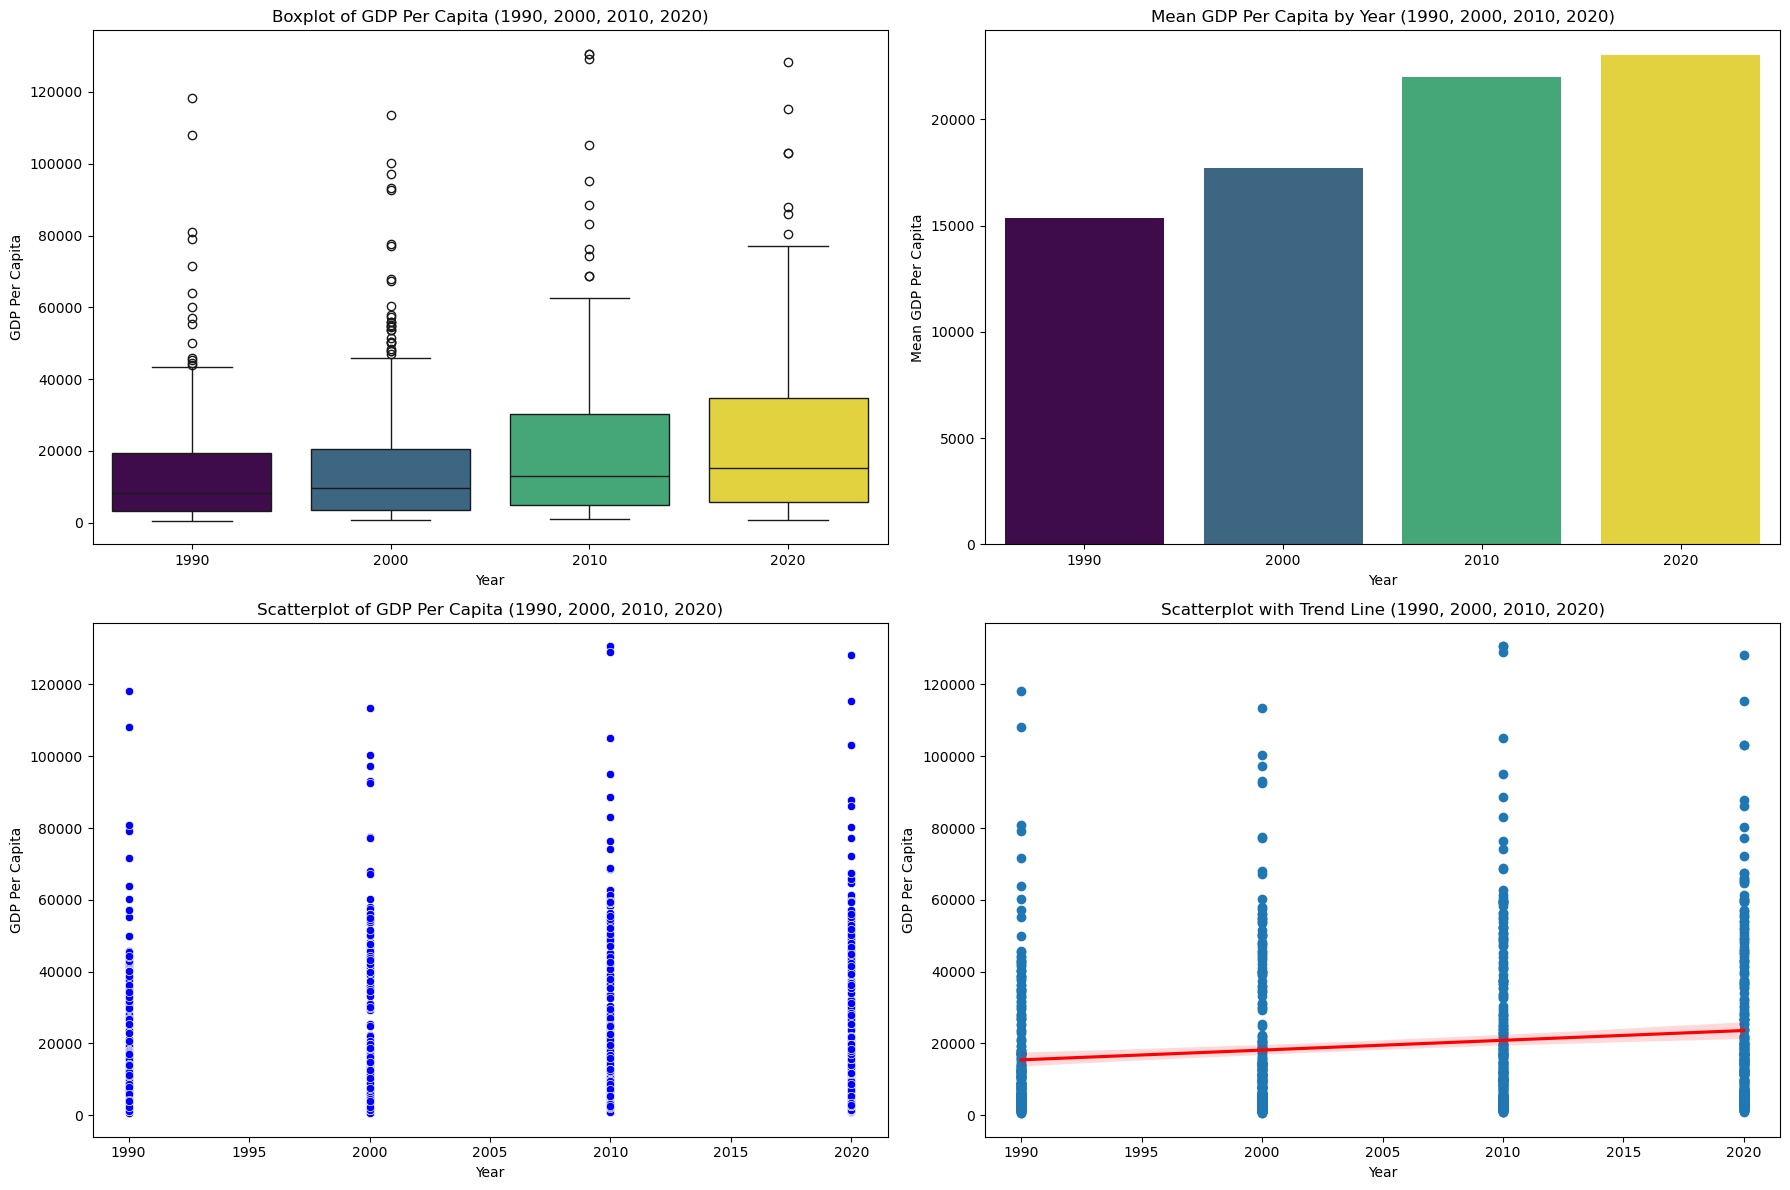

In [134]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])].dropna()

plt.figure(figsize=(18, 12))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(
    data=gdp_decades,
    x='Year',
    y='GDP_Per_Capita',
    hue='Year', 
    palette='viridis',
    legend=False 
)
plt.title('Boxplot of GDP Per Capita (1990, 2000, 2010, 2020)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

# Barplot
plt.subplot(2, 2, 2)
mean_gdp_by_year = gdp_decades.groupby('Year')['GDP_Per_Capita'].mean().reset_index()
sns.barplot(
    data=mean_gdp_by_year,
    x='Year',
    y='GDP_Per_Capita',
    hue='Year', 
    palette='viridis',
    legend=False 
)
plt.title('Mean GDP Per Capita by Year (1990, 2000, 2010, 2020)')
plt.xlabel('Year')
plt.ylabel('Mean GDP Per Capita')

# Scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita', alpha=1, color='blue')
plt.title('Scatterplot of GDP Per Capita (1990, 2000, 2010, 2020)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

# Scatterplot with Trend Line
plt.subplot(2, 2, 4)
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita', scatter_kws={'alpha': 1}, line_kws={'color': 'red'})
plt.title('Scatterplot with Trend Line (1990, 2000, 2010, 2020)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.tight_layout()

For this data, the scatter plots do not do well at representing change due to the grouping by decades.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [50]:
high_gdp = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

high_gdp_sorted = high_gdp.sort_values(by='Year')

first_country_high_gdp = high_gdp_sorted.iloc[0]

print(f"The first country to have a GDP per capita greater than $100,000 was {first_country_high_gdp['Country']} in {int(first_country_high_gdp['Year'])}.")

The first country to have a GDP per capita greater than $100,000 was United Arab Emirates in 1990.


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

The country with the highest GDP per capita in 2020 was Luxembourg with a GDP per capita of $128256.56.


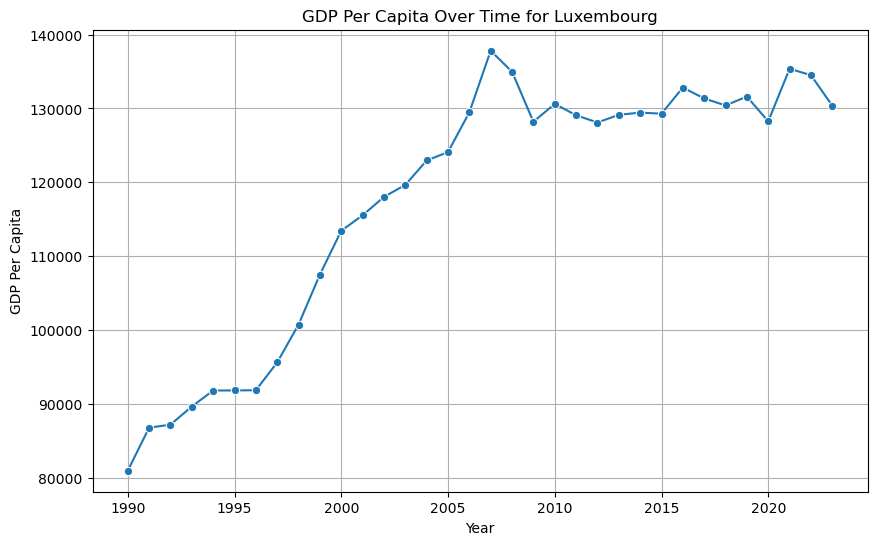

In [128]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

highest_gdp_2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]
country_highest_gdp = highest_gdp_2020['Country']

print(f"The country with the highest GDP per capita in 2020 was {country_highest_gdp} with a GDP per capita of ${highest_gdp_2020['GDP_Per_Capita']:.2f}.")

country_data = gdp_df[gdp_df['Country'] == country_highest_gdp]

plt.figure(figsize=(10, 6))
sns.lineplot(data=country_data, x='Year', y='GDP_Per_Capita', marker='o')
plt.title(f"GDP Per Capita Over Time for {country_highest_gdp}")
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True)

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

The country with the lowest GDP per capita in 2020 was Burundi with a GDP per capita of $833.92.


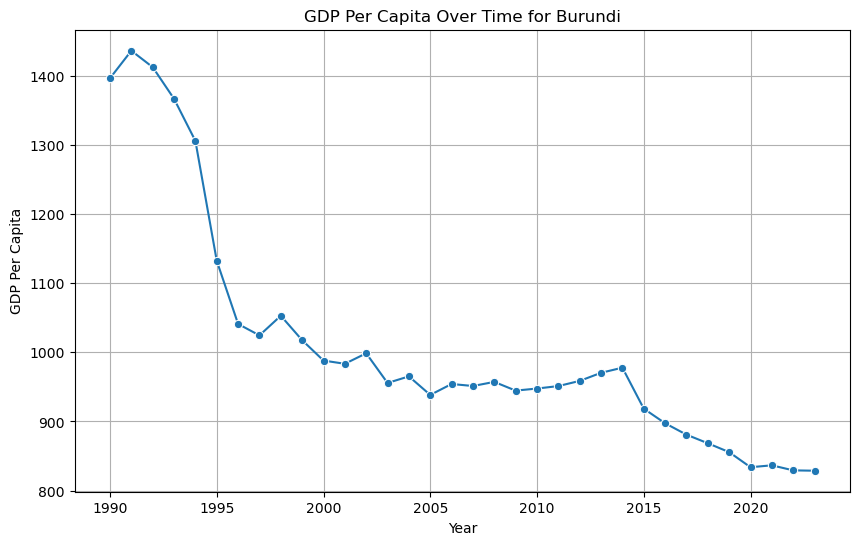

Bonus Question
On average, countries had a higher GDP per capita in 2020 than in 1990 (average difference: $7376.28).

Countries with lower GDP per capita in 2020 than in 1990:
                                      Country  GDP_Per_Capita_1990  \
10                                      Aruba         34579.220640   
16                                   Barbados         16976.761648   
27                                     Brunei        118163.683198   
30                                    Burundi          1396.077627   
37                   Central African Republic          1481.252551   
44                                      Congo          8699.526839   
49                            Dem. Rep. Congo          2172.001597   
71   Fragile and conflict affected situations          6062.707946   
73                                      Gabon         23884.810700   
84                                      Haiti          3946.365646   
111                           Kyrgyz Republic        

In [54]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

lowest_gdp_2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmin()]
country_lowest_gdp = lowest_gdp_2020['Country']

print(f"The country with the lowest GDP per capita in 2020 was {country_lowest_gdp} with a GDP per capita of ${lowest_gdp_2020['GDP_Per_Capita']:.2f}.")

country_data = gdp_df[gdp_df['Country'] == country_lowest_gdp]

plt.figure(figsize=(10, 6))
sns.lineplot(data=country_data, x='Year', y='GDP_Per_Capita', marker='o')
plt.title(f"GDP Per Capita Over Time for {country_lowest_gdp}")
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True)
plt.show()

print('Bonus Question')

gdp_1990 = gdp_df[gdp_df['Year'] == 1990]
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

gdp_comparison = pd.merge(gdp_1990, gdp_2020, on='Country', suffixes=('_1990', '_2020'))

gdp_comparison['GDP_Difference'] = gdp_comparison['GDP_Per_Capita_2020'] - gdp_comparison['GDP_Per_Capita_1990']

average_gdp_difference = gdp_comparison['GDP_Difference'].mean()
if average_gdp_difference > 0:
    print(f"On average, countries had a higher GDP per capita in 2020 than in 1990 (average difference: ${average_gdp_difference:.2f}).")
else:
    print(f"On average, countries did not have a higher GDP per capita in 2020 than in 1990 (average difference: ${average_gdp_difference:.2f}).")

countries_lower_gdp = gdp_comparison[gdp_comparison['GDP_Difference'] < 0]
print("\nCountries with lower GDP per capita in 2020 than in 1990:")
print(countries_lower_gdp[['Country', 'GDP_Per_Capita_1990', 'GDP_Per_Capita_2020', 'GDP_Difference']])

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [126]:
# Manually removed footnotes table from csv
internet_df = pd.read_csv("../data/UN_Internet.csv")

print(internet_df.head())
print(internet_df.tail())

  Country or Area  Year  Value Value Footnotes
0     Afghanistan  2019  17.60               1
1     Afghanistan  2018  16.80               2
2     Afghanistan  2017  13.50               3
3     Afghanistan  2016  11.00               4
4     Afghanistan  2015   8.26               4
     Country or Area  Year     Value Value Footnotes
6078        Zimbabwe  1997  0.033080             NaN
6079        Zimbabwe  1996  0.016790             NaN
6080        Zimbabwe  1995  0.007684             NaN
6081        Zimbabwe  1994  0.001739             NaN
6082        Zimbabwe  1990  0.000000             NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [58]:
internet_df.drop('Value Footnotes', axis=1, inplace=True)
internet_df.rename(columns={
    'Country or Area': 'Country',
    'Year': 'Year',
    'Value': 'Internet_Users_Pct'
}, inplace=True)

print(internet_df.head())
print(internet_df.tail())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2019               17.60
1  Afghanistan  2018               16.80
2  Afghanistan  2017               13.50
3  Afghanistan  2016               11.00
4  Afghanistan  2015                8.26
       Country  Year  Internet_Users_Pct
6078  Zimbabwe  1997            0.033080
6079  Zimbabwe  1996            0.016790
6080  Zimbabwe  1995            0.007684
6081  Zimbabwe  1994            0.001739
6082  Zimbabwe  1990            0.000000


16. Look at the number of observations in this dataset per year. What do you notice?

2023 is an oddly low outlier, and 1990 is an outlier for the inverse reason.

In [60]:
internet_df['Year'] = pd.to_numeric(internet_df['Year'], errors='coerce')

internet_df = internet_df.dropna(subset=['Year'])

internet_df = internet_df[internet_df['Year'] != 0]

internet_df['Year'] = internet_df['Year'].astype(int)

observations_per_year = internet_df['Year'].value_counts().sort_index()

print("Number of observations per year:")
print(observations_per_year)

Number of observations per year:
Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: count, dtype: int64


17. What is the first year to have a non-zero internet users percentage value?

In [124]:
internet_df = internet_df.dropna(subset=['Internet_Users_Pct'])
internet_df = internet_df[internet_df['Internet_Users_Pct'] > 0]

min_per_year = internet_df.groupby('Year')['Internet_Users_Pct'].min()

years_without_zero = min_per_year[min_per_year > 0].index

first_year = years_without_zero.min()
print(f"First year with non-zero internet users percentage value: {first_year}")

First year with non-zero internet users percentage value: 1990


18. How does the distribution of internet users percent differ for 2000 and 2014?

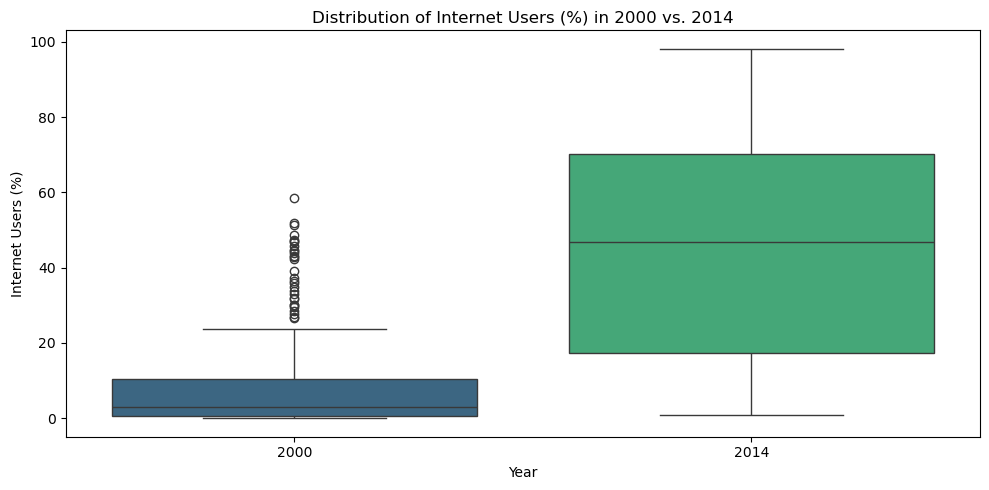

In [122]:
df_2000 = internet_df[(internet_df['Year'] == 2000) & (internet_df['Internet_Users_Pct'] > 0)]
df_2014 = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] > 0)]

df_combined = pd.concat([
    df_2000.assign(Year='2000'),
    df_2014.assign(Year='2014')])

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_combined,
    x='Year',
    y='Internet_Users_Pct',
    hue='Year',  
    palette='viridis',
    legend=False 
)
plt.title('Distribution of Internet Users (%) in 2000 vs. 2014')
plt.xlabel('Year')
plt.ylabel('Internet Users (%)')
plt.tight_layout()

19. For how many countries was the percentage of internet users below 5% in 2014?

In [116]:
internet_df['Year'] = pd.to_numeric(internet_df['Year'], errors='coerce')
internet_df['Internet_Users_Pct'] = pd.to_numeric(internet_df['Internet_Users_Pct'], errors='coerce')

df_2014_below_5 = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]

num_countries_below_5 = df_2014_below_5['Country'].nunique()

print(f"Number of countries with internet users below 5% in 2014: {num_countries_below_5}")
print(df_2014_below_5)

Number of countries with internet users below 5% in 2014: 10
                               Country  Year  Internet_Users_Pct
873                            Burundi  2014             1.04239
1033          Central African Republic  2014             2.70000
1061                              Chad  2014             2.90000
1517  Democratic Republic of the Congo  2014             3.00000
1782                           Eritrea  2014             0.99000
2451                     Guinea-Bissau  2014             3.32000
3364                        Madagascar  2014             3.70000
4073                             Niger  2014             1.24868
5055                           Somalia  2014             1.63000
5116                       South Sudan  2014             2.60000


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [112]:
gdp_and_internet_use = pd.merge(
    gdp_df,
    internet_df,
    on=['Country', 'Year'],  
    how='inner')

print("First few rows:")
print(gdp_and_internet_use.head())

print("\nLast few rows:")
print(gdp_and_internet_use.tail())

First few rows:
       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2019     2927.245144               17.60
1  Afghanistan  2018     2902.392113               16.80
2  Afghanistan  2017     2952.998916               13.50
3  Afghanistan  2016     2958.785399               11.00
4  Afghanistan  2015     2967.692067                8.26

Last few rows:
       Country  Year  GDP_Per_Capita  Internet_Users_Pct
4610  Zimbabwe  1998     4342.858177            0.081648
4611  Zimbabwe  1997     4304.406272            0.033080
4612  Zimbabwe  1996     4271.479930            0.016790
4613  Zimbabwe  1995     3935.280057            0.007684
4614  Zimbabwe  1994     3965.730986            0.001739


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

Top 3 countries with the highest internet users' percentage in 2014:
                          Country  Year  Internet_Users_Pct
2592                      Iceland  2014              98.158
1893  Falkland (Malvinas) Islands  2014              97.600
602                       Bermuda  2014              96.800


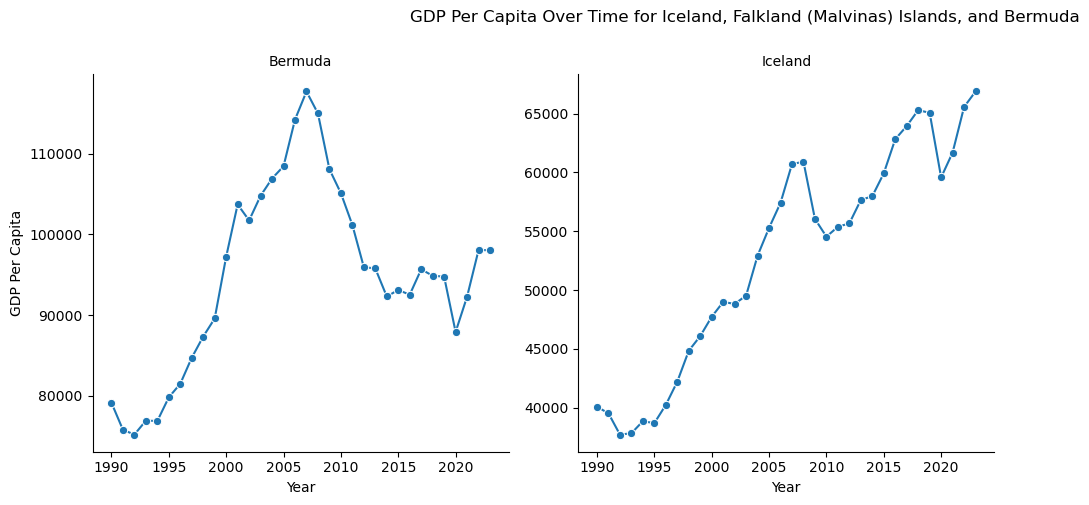

In [84]:
df_2014 = internet_df[internet_df['Year'] == 2014]

top_3_countries_2014 = df_2014.sort_values(by='Internet_Users_Pct', ascending=False).head(3)

print("Top 3 countries with the highest internet users' percentage in 2014:")
print(top_3_countries_2014[['Country', 'Year', 'Internet_Users_Pct']])

countries_of_interest = ['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda']
filtered_df = gdp_df[gdp_df['Country'].isin(countries_of_interest)]

g = sns.FacetGrid(filtered_df, col='Country', col_wrap=3, height=5, sharey=False)
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita', marker='o')

g.set_axis_labels('Year', 'GDP Per Capita')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('GDP Per Capita Over Time for Iceland, Falkland (Malvinas) Islands, and Bermuda', y=1)

plt.tight_layout()

Falkland Islands does not have GPD data

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [86]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

print("First few rows of gdp_and_internet_use_2014:")
print(gdp_and_internet_use_2014.head())

First few rows of gdp_and_internet_use_2014:
         Country  Year  GDP_Per_Capita  Internet_Users_Pct
5    Afghanistan  2014     3017.942544              7.0000
27       Albania  2014    12788.747231             54.3000
55       Algeria  2014    15073.762940             29.5000
83       Andorra  2014    59929.244467             86.1000
109       Angola  2014    10250.592404             21.3623


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

There is a correlation between increase in GDP and Internet Users.


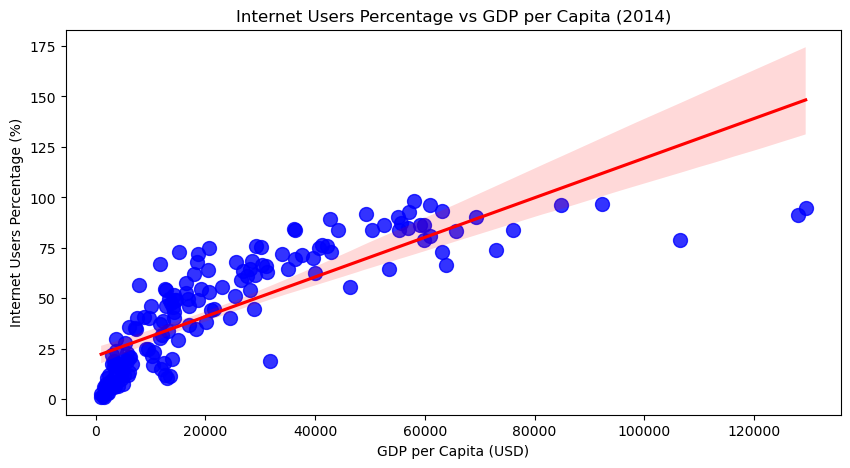

In [110]:
plt.figure(figsize=(10, 5))
sns.regplot(
    data=gdp_and_internet_use_2014,
    x='GDP_Per_Capita',
    y='Internet_Users_Pct',
    scatter_kws={'s': 100, 'color': 'blue'}, 
    line_kws={'color': 'red'})

plt.title('Internet Users Percentage vs GDP per Capita (2014)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Internet Users Percentage (%)')

print('There is a correlation between increase in GDP and Internet Users.')

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

First few rows with GDP_group:
         Country  Year  GDP_Per_Capita  Internet_Users_Pct GDP_group
5    Afghanistan  2014     3017.942544              7.0000       Low
27       Albania  2014    12788.747231             54.3000    Medium
55       Algeria  2014    15073.762940             29.5000    Medium
83       Andorra  2014    59929.244467             86.1000      High
109       Angola  2014    10250.592404             21.3623    Medium


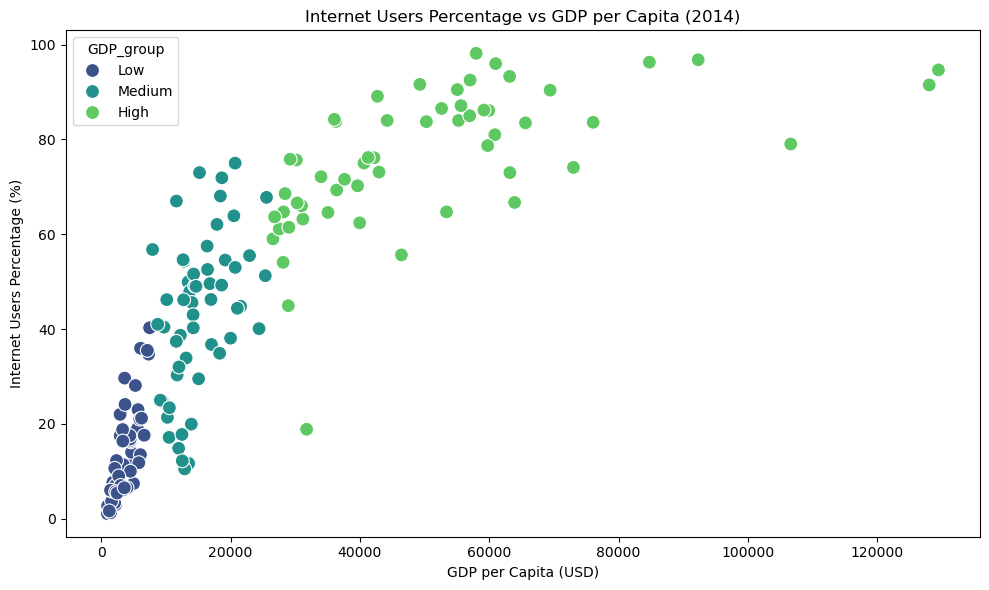

In [104]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].copy()

gdp_and_internet_use_2014['GDP_group'] = pd.qcut(
    gdp_and_internet_use_2014['GDP_Per_Capita'],
    q=3,  
    labels=['Low', 'Medium', 'High'])

print("First few rows with GDP_group:")
print(gdp_and_internet_use_2014.head())

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=gdp_and_internet_use_2014,
    x='GDP_Per_Capita',
    y='Internet_Users_Pct',
    hue='GDP_group', 
    palette='viridis', 
    s=100)

plt.title('Internet Users Percentage vs GDP per Capita (2014)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Internet Users Percentage (%)')
plt.tight_layout()

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [102]:
median_internet_by_gdp_group = gdp_and_internet_use_2014.groupby(
    'GDP_group', observed=False)['Internet_Users_Pct'].median()

print("Median Internet Users Percentage by GDP Group:")
print(median_internet_by_gdp_group)

Median Internet Users Percentage by GDP Group:
GDP_group
Low       11.4000
Medium    45.5904
High      76.1603
Name: Internet_Users_Pct, dtype: float64


The median data supports the correlation shown in the plot for Q#23